In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
f = lambda th: np.sin(.5*th[0]**2 - .25*th[1]**2 + 3)*np.cos(2*th[0] + 1 - np.exp(th[1]))

fx = lambda th: (np.cos(.5*th[0]**2 - .25*th[1]**2 + 3) * th[0] * np.cos(2*th[0] + 1 - np.exp(th[1]))) - np.sin(2*th[0] + 1 - np.exp(th[1])) * np.sin(.5*th[0]**2 - .25*th[1]**2 + 3)*2
fy = lambda th: (np.cos(.5*th[0]**2 - .25*th[1]**2 + 3) * -.5*th[1] * np.cos(2*th[0] + 1 - np.exp(th[1]))) - np.sin(2*th[0] + 1 - np.exp(th[1]))* - np.exp(th[1]) * np.sin(.5*th[0]**2 - .25*th[1]**2 + 3)

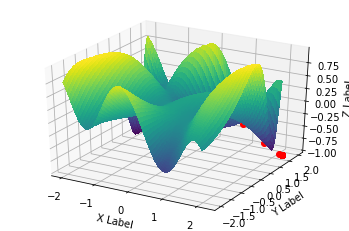

In [3]:
lr = .01
Theta = np.random.rand(2)*2 - 1
T = np.copy(Theta)
grad = np.zeros(2)

x = []
y = []
z = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_x = _y = np.arange(-2, 2, .05)
X, Y = np.meshgrid(_x, _y)
zs = np.array(f((np.ravel(X), np.ravel(Y))))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
#ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False)

x.append(Theta[0])
y.append(Theta[1])
z.append(f(Theta))
for _ in range(200000):
    for it, th in enumerate(Theta):
        dx, dy = fx(Theta), fy(Theta)
        Theta = [Theta[0] - lr*dx, Theta[1] - lr*dy]
    if(_ % 40 == 0):
        x.append(Theta[0])
        y.append(Theta[1])
        z.append(f(Theta))

ax.plot(x, y, z, 'ro')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

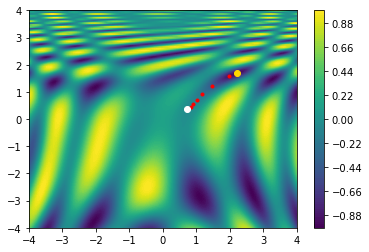

In [8]:
#second figure
res = 120
x_ = np.linspace(-4, 4, res)
y_ = np.linspace(-4, 4, res)

z_ = np.zeros((res, res))

for ix, i in enumerate(x_):
    for iy, j in enumerate(y_):
        z_[iy, ix] = f([i, j])

plt.contourf(x_, y_, z_, res)
plt.colorbar()


plt.plot(x, y, '.', c = 'red')

plt.plot(T[0], T[1], 'o', c = 'white')
plt.plot(Theta[0], Theta[1], 'o', c = 'gold')

plt.show()